In [0]:
import numpy as np 
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import FreqDist
import string
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize, FreqDist
import seaborn as sns
sns.set_style('dark')
import requests
from PIL import Image

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [0]:
from google.colab import files
uploaded = files.upload()


!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c msk-redefining-cancer-treatment

In [0]:
df_train_txt = pd.read_csv('training_text', sep='\|\|', header=None, skiprows=1, names=["ID","Text"])
df_train_var = pd.read_csv('training_variants')
df_train = pd.merge(df_train_txt, df_train_var, how='left', on='ID')
df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [0]:
df_train.isnull().sum()

ID           0
Text         5
Gene         0
Variation    0
Class        0
dtype: int64

In [0]:
df_train.shape

(3321, 5)

In [0]:
df_train.dropna(axis=0, how='any', inplace=True)
df_train.shape

(3316, 5)

In [0]:
df_train['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

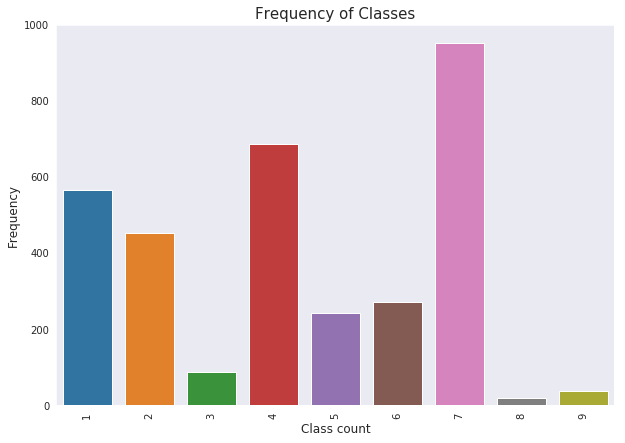

In [0]:
# Frequency of Classes in dataset
plt.figure(figsize=(10,7))
sns.countplot(x="Class", data = df_train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

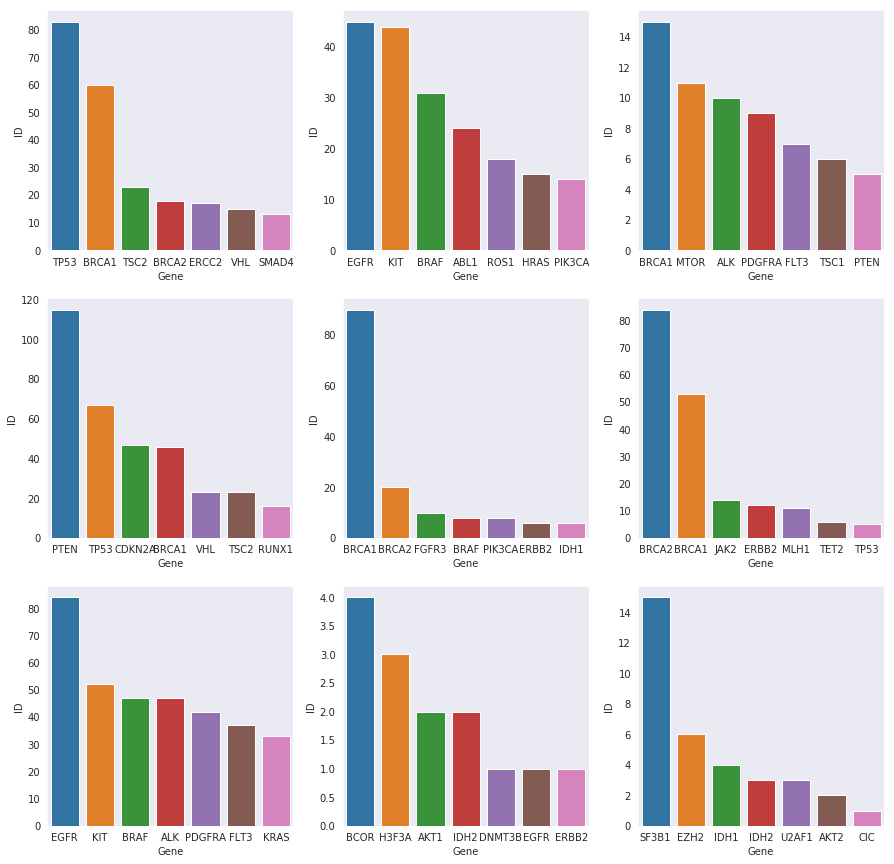

In [0]:
#Plot Top 7 genes in each class
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = df_train[df_train["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7, ax=axs[i][j])

In [0]:
df_train.loc[:, 'Text_count'] = df_train['Text'].apply(lambda x: len(x.split()))
df_train.head()

,ID,Text,Gene,Variation,Class,Text_count
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1,6089
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2,5756
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2,5756
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4,6202


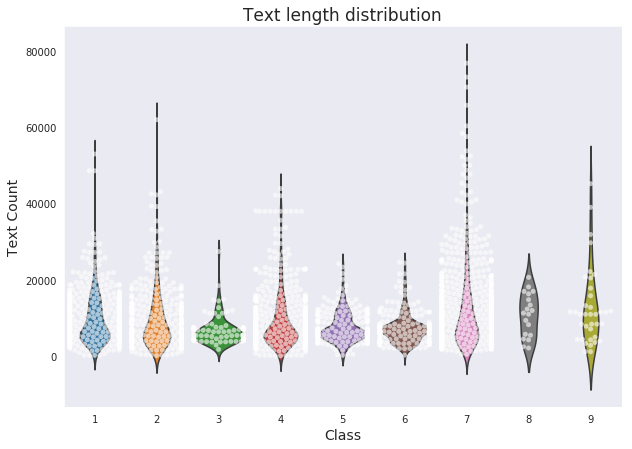

In [0]:
#get distribution of text count for each class
plt.figure(figsize=(10,7))
gene_count_gr = df_train.groupby('Gene')['Text_count'].sum().reset_index()
sns.violinplot(x='Class', y='Text_count', data= df_train, inner=None)
sns.swarmplot(x='Class', y="Text_count", data=df_train, color='w', alpha=0.6)
plt.ylabel('Text Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title('Text length distribution', fontsize=17)
plt.show()

In [0]:
stop = stopwords.words('english')+["mutat","cell","cancer","fig","mutant", "et", "figur", "al", "use"]
snowball = nltk.SnowballStemmer('english')
WNlemma = nltk.WordNetLemmatizer()
def preprocess(toks):
    toks = [ t.lower() for t in toks if t not in string.punctuation ]
    toks = [t for t in toks if t not in stop ]
    toks = [ snowball.stem(t) for t in toks ]
    toks = [ WNlemma.lemmatize(t) for t in toks ]
    toks = [t for t in toks if t not in stop ]
    toks_clean = [ t for t in toks if len(t) >= 2 ]
    return toks

In [0]:
df_train['Text']=df_train['Text'].apply(lambda x: str(x))
df_train['Tokens'] = df_train['Text'].apply(lambda x: word_tokenize(x))
df_train['Tokens_clean'] = df_train['Tokens'].apply(lambda x: preprocess(x))
df_train['Tokens_clean_text'] = df_train['Tokens_clean'].apply(lambda x: ' '.join(x))

Class 1


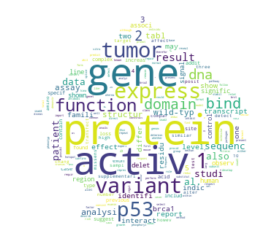

Class 2


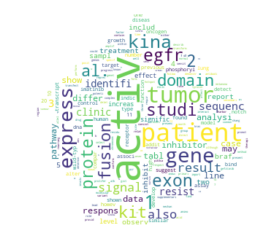

Class 3


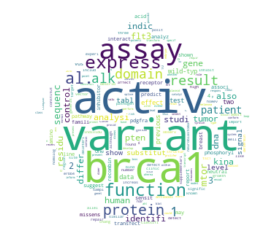

Class 4


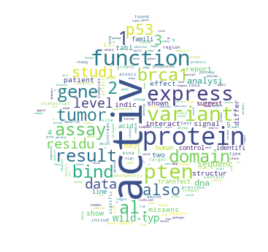

Class 5


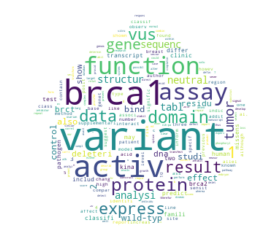

Class 6


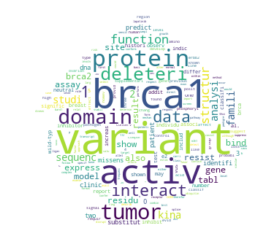

Class 7


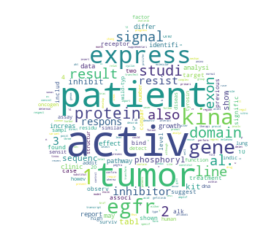

Class 8


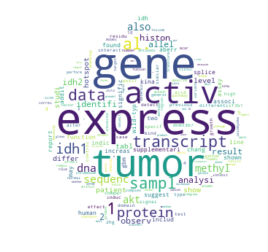

Class 9


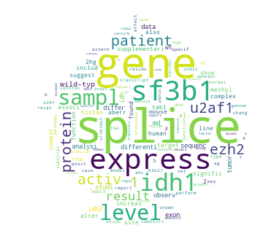

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud_class(category):
    class_words=df_train.Tokens_clean[df_train.Class==category]
    class_words_list = [ c for l in class_words for c in l ]
    fd_class_words = FreqDist(class_words_list)
    mask=mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/f/1/5/0/1194985571905910902pinkhome2.svg.med.png', stream=True).raw))
    wc_grain = WordCloud(background_color="white", mask=mask).generate_from_frequencies(fd_class_words)
    plt.imshow(wc_grain, interpolation='bilinear')
    plt.axis("off")
    plt.show()
for i in range(1,10):
    print(f"Class {i}")
    word_cloud_class(i)
    
    